# Demo: Identifying Patterned Relationships and Correlation

In [1]:
# Initial imports
import numpy as np
import pandas as pd
import hvplot.pandas
from path import Path

## Loading Time Series Data Into a DataFrame

In [2]:
# Set the file path
file_path = Path("../Resources/national-home-sales.csv")

In [3]:
# Load time series data into Pandas
df_home_sales = pd.read_csv(
    file_path,
    index_col="period_end_date",
    parse_dates=True
)

In [4]:
# Display sample data
df_home_sales.head(10)

,inventory,homes_sold,median_sale_price
period_end_date,,,
2020-01-01,1250798,377964,289000
2020-02-01,1265253,405992,294000
2020-03-01,1316823,507324,303000
2020-04-01,1297460,436855,304000
2020-05-01,1289500,421351,299000
2020-06-01,1219863,587635,310000
2020-07-01,1165359,700733,323000
2020-08-01,1066903,652878,328000
2012-02-01,2078931,304737,160000


In [5]:
# Sort the DataFrame index in ascending order
df_home_sales = df_home_sales.sort_index()

# Display sample data
df_home_sales.head(10)

,inventory,homes_sold,median_sale_price
period_end_date,,,
2012-02-01,2078931,304737,160000
2012-03-01,2120173,394034,171000
2012-04-01,2155803,404927,178000
2012-05-01,2163303,464281,186000
2012-06-01,2145658,487959,194000
2012-07-01,2109202,451243,192000
2012-08-01,2048712,485480,190000
2012-09-01,2010080,392397,187000
2012-10-01,1936114,423079,185000


## Identifying Seasonal Patterns

<Axes: xlabel='period_end_date'>

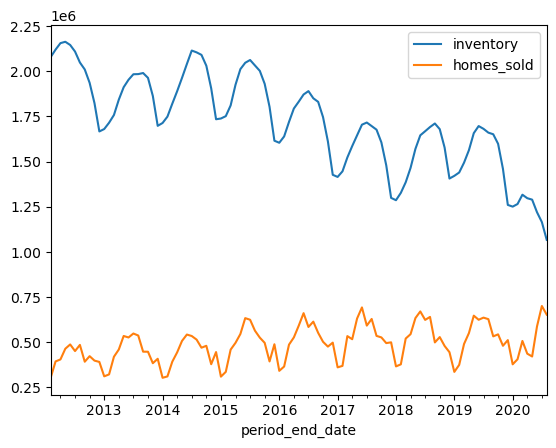

In [7]:
# Plot the inventory and homes_sold series
df_home_sales[["inventory","homes_sold"]].plot()

## Analyzing Data Correlations

In [8]:
# Compute the correlation between "inventory" and "homes_sold"
# Select homes sold in 2014 using the year
sales_2014 = df_home_sales["homes_sold"].loc["2014"]

# Display 2014 home sales data
print(sales_2014)

period_end_date
2014-01-01    303454
2014-02-01    310918
2014-03-01    392509
2014-04-01    444227
2014-05-01    507516
2014-06-01    542753
2014-07-01    534616
2014-08-01    514686
2014-09-01    469975
2014-10-01    480451
2014-11-01    378599
2014-12-01    445766
Name: homes_sold, dtype: int64


<Axes: title={'center': 'Homes Sold in 2014'}, xlabel='period_end_date'>

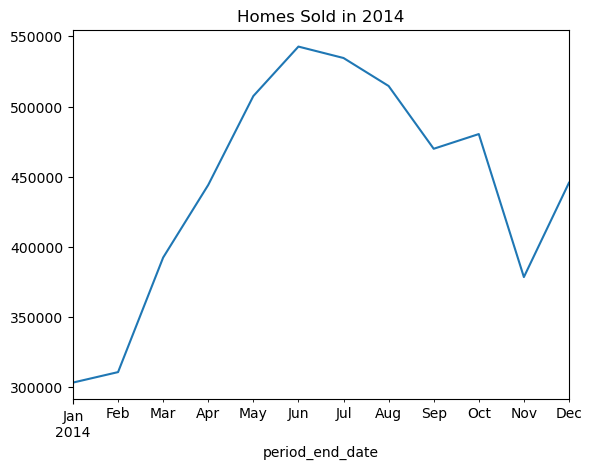

In [9]:
sales_2014.plot(title="Homes Sold in 2014")

In [10]:
df_home_sales.hvplot.heatmap(
    x="index.year",                     
    y="index.quarter", 
    C="homes_sold", 
    cmap="blues"
).aggregate(function=np.mean)

:HeatMap   [index.year,index.quarter]   (homes_sold)